# Change to **GPU : It is fine 😊😊😊😊** 

1.    From **Runtime**
2.   Hardware accelerator select **GPU**.



# **Installation of PyTorch**


In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


# **Numpy and PyTorch **

**Dependencies**

In [0]:
import torch 
import numpy as np

 Convert array **a** = [[1,2],[3,4]] to numpy array **A** using np.array()

Convert A to PyTorch Tensor(**A_p**) using **torch.Tensor** 

Compare the datatype of **A** and **A_p**


Convert Torch to Numpy using **torch_tensor.numpy()**

# **Variable**

**Variables**

*     A Variable wraps a Tensor.
 
*  Allow accumulation of gradients.

Import the Variable class =>** from torch.autograd import Variable**

In [0]:
from torch.autograd import Variable

1.   create **a** torch tensor of ones(2,2)
2.   wrap in Variable(**a_V**) with r**equires_grad** for differentiability
3. To verify with **print(a_V.requires_grad)**


# **CS231n example**

**Define the leaf nodes** =====> variable_name = Variable(**Tensor_datatype**(**[numerical_value**]))

*   DoubleTensor - datatype
*   FloatTensor - datatype



In [0]:
#x0 = Variable(DoubleTensor([-1]))

Recall: import the from datatype class. import Tensor Datatype =>** from torch import FloatTensor, DoubleTensor**

In [0]:
 from torch import FloatTensor, DoubleTensor

Recall that the **nodes** are **operations**

brackprop with** backward()**

print the operation on each intermediate node with **node.grad_fn**

Gradient of leaf nodes(x,y,z) wr.t to last node using **node.grad**

**From cs231n**

1. **add** node: gradient distributor
2. **mu**l node: gradient switcher



# **Dataloader**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Recall from the last class with used this dataset

In [0]:
x = ([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y = ([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Convert to numpy array using** np.array(....)** and reshape with** np.reshape(...)**

import from Dataset and DataLoader using =>** from torch.utils.data import Dataset, DataLoader**

class dataname(Dataset):
  
  def __init__(self):


*   train_x(np.array**(x**), **dtype**=np.double} #download x
*   train_y(np.array(**y**),** dtype**=np.double} #download y
    

*   self.len = train_x.shape[0]  # length of the sample

*   self.x_data = torch.from_numpy(train_x).float()
*   self.y_data = torch.from_numpy(train_y).float()
    
 
 
 def __getitem__(self,index):
    return self.x_data[index], self.y_data[index]
    
  def __len__(self):
    return self.len
    
    

Make an instance of myData class

In [0]:
... = dataname()

Feed the DataLoader 


>train_loader = DataLoader(**dataset**=....,
                          **batch_size**=....,
                          **shuffle**=....,
                          **num_workers**=...)



**Next Week Linear Regression bear with us**

In [0]:
import torch.nn as nn

#Step 1: Create Model Class

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out
      

In [0]:
#Step 2: Instantiate Model Class
model = LinearRegression()

######---------GPU---------######


In [0]:
# Step 3: Instantiate loss class
criterion = nn.MSELoss()
learning_rate = 0.0001

#Step 4: Instantiate Optimizer class
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
epochs = 10000

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
      # get the input
      inputs , labels = data
      
      ######---------GPU---------######
      
#      if torch.cuda.is_available():
#        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
        
#      else:
      if torch.cuda.is_available():
          inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
      else:
               #wrap with variable
          inputs, labels = Variable(inputs), Variable(labels)
  
      
      #Clear gradient w.r.t parameters # Flag
      optimizer.zero_grad()
      
      #Forward to get output
      outputs = model(inputs)
      
      #Calculate loss
      loss = criterion(outputs, labels)
      
      # Getting gradients w.r.t parameters
      loss.backward()
    
       #updating parameters
      optimizer.step()
    
    
      print('epoch {}, loss {}'.format(epoch, loss.data[0]))

In [0]:
x_T  = torch.from_numpy(x).float()
y_T = torch.from_numpy(y).float()

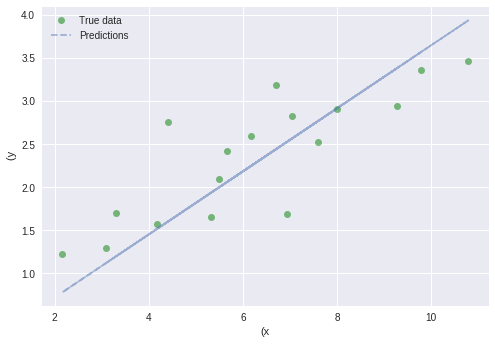

In [387]:
# Clear figure
#plt.clf()

# Get predictions
predicted = model(Variable((x_T))).data.numpy()

# Plot true data
plt.plot(x_T.numpy(), y_T.numpy(), 'go', label= 'True data', alpha=.5)

# Plot predictions
plt.plot(x_T.numpy(), predicted, '--', label="Predictions", alpha=.5)

plt.xlabel("(x")
plt.ylabel(" (y")

# Legend and plot
plt.legend(loc='best')
plt.show()

The values of m and b can be obtained using this statement **print(model.state_dict())**

In [0]:
print(model.state_dict())

Therefore the equation of the line is y = **?**x + **?**

# **CUDA**

Testing cuda with **torch.cuda.is_available()**  😊😊😊😊

In [0]:
# CPU 
tensor_cpu = torch.ones(3,3)

In [0]:
# CPU to GPU
if torch.cuda.is_available():
    tensor_cpu.cuda()

In [0]:
#GPU to CPU
tensor_cpu.cpu()

GPU:** 2** things must be on GPU

1.   **model**
2.   **Variable**



In [0]:
print(torch.cuda.is_available())